In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import datasets, linear_model
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score

In [2]:
#goal: predict life expectancy
#features: year, country, schooling, income composition of resources, gdp, status, infant deaths

In [3]:
life_expectancy_csv = pd.read_csv("Life Expectancy Data.csv")

In [4]:
life_expectancy_csv

life_expectancy_csv.fillna(0, inplace = True) #mention in text

life_expectancy_csv

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
mean_life_expectancy_df = life_expectancy_csv.groupby('Country').mean()
mean_life_expectancy_df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,64.5625,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.0000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,2007.5,73.61875,108.1875,20.3125,0.381250,236.185241,58.5000,1943.8750,48.74375,23.5000,91.7500,4.316250,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,2007.5,49.01875,328.5625,83.7500,5.381875,102.100268,39.5000,3561.3125,18.01875,132.6250,46.1250,3.674375,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,2007.5,75.05625,127.5000,0.0000,7.452500,1001.585226,92.1250,0.0000,38.42500,0.0000,96.9375,4.491875,98.3125,0.12500,9759.305728,0.000000e+00,3.42500,3.37500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2007.5,73.38750,163.0000,9.3750,6.956250,0.000000,66.2500,165.0000,54.48750,10.7500,74.6875,4.686250,68.5000,0.10000,0.000000,0.000000e+00,1.65000,1.56250,0.726812,12.78750
Viet Nam,2007.5,74.77500,126.5625,29.1875,2.894375,0.000000,71.1250,4232.9375,11.18750,36.5000,94.9375,5.603750,91.7500,0.14375,0.000000,0.000000e+00,14.92500,15.62500,0.627063,11.51250
Yemen,2007.5,63.86250,211.8125,39.3750,0.044375,0.000000,55.6875,2761.1875,33.48750,51.6250,67.1250,4.692500,72.6250,0.10000,0.000000,0.000000e+00,13.83125,13.75000,0.475500,8.50625


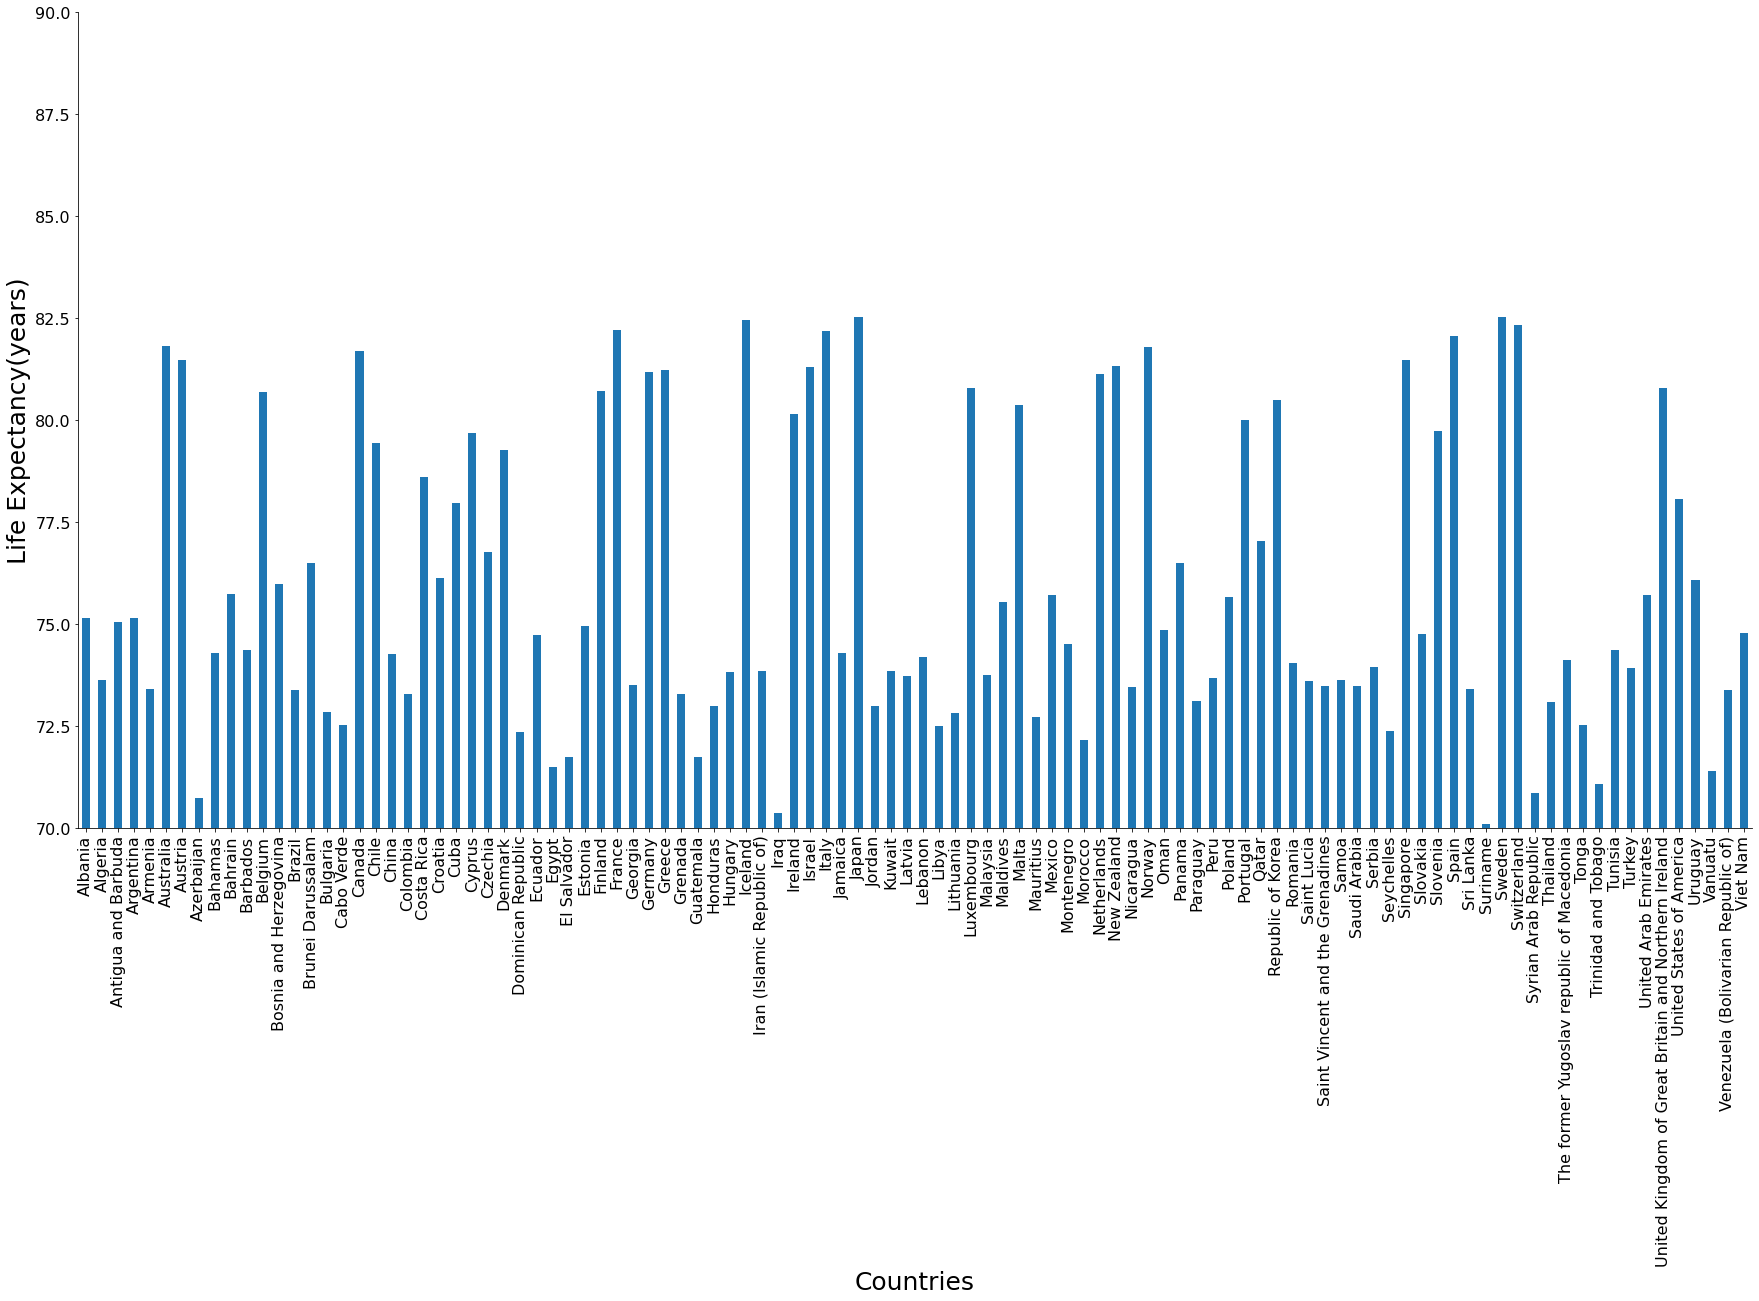

In [6]:
life_expectancy_greater_70 = mean_life_expectancy_df[mean_life_expectancy_df['Life expectancy '] >= 70]['Life expectancy ']

fig = plt.figure(figsize=(30, 15))

plt.rcParams['font.size'] = '16'

ax = life_expectancy_greater_70.plot.bar()

ax.set_ylabel('Life Expectancy(years)',fontsize = 25)

ax.set_xlabel('Countries',fontsize = 25)

ax.set_ylim(70,90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

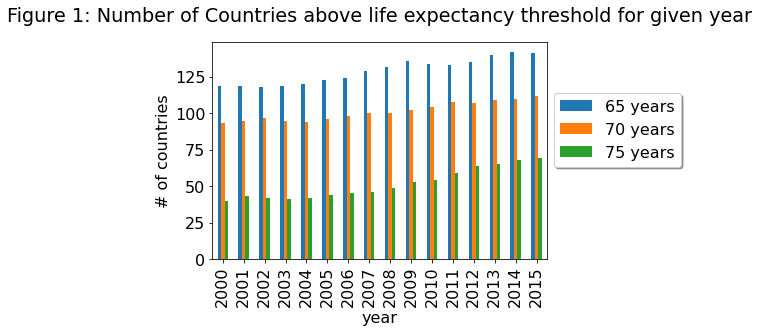

In [7]:
#countries above 65

country_count_list = []

year_list = []

for year in life_expectancy_csv['Year'].unique():
    year_list.append(year)
    
year_list.sort()

year_list

year_country_dict = {'year': [],
                     '65 years': [],
                     '70 years': [],
                     '75 years': []
                     }

for year in year_list:
    year_df = life_expectancy_csv[life_expectancy_csv['Year'] == year]
    year_country_dict['year'].append(year)
    year_country_dict['65 years'].append(len(year_df[year_df['Life expectancy '] > 65]))
    year_country_dict['70 years'].append(len(year_df[year_df['Life expectancy '] > 70]))
    year_country_dict['75 years'].append(len(year_df[year_df['Life expectancy '] > 75]))
    

df = pd.DataFrame(year_country_dict)

df = df.set_index('year')

ax = df.plot.bar()

ax.set_ylabel("# of countries")

ax.set_title("Figure 1: Number of Countries above life expectancy threshold for given year", pad=20)

ax.legend(loc='upper center', bbox_to_anchor=(1.21, 0.8), shadow=True, ncol=1)

plt.savefig('Figure 1_1.png', dpi=300, bbox_inches='tight')

In [8]:
developed_countries = life_expectancy_csv[life_expectancy_csv['Status'] == 'Developing']['Country'].unique()

countries_over_70 = life_expectancy_greater_70.index

total_countries = len(countries_over_70) 

total_countries

#104 countries with life exp. over 70 out of 193

104

In [9]:
develop_count = 0
for country in countries_over_70: 
    if country in developed_countries: 
        develop_count += 1
        
develop_count

#72/104 are developed countries; high correlation to life expectancy over 70

72

In [10]:
life_expectancy_greater_70 = mean_life_expectancy_df[mean_life_expectancy_df['Life expectancy '] >= 70]

countries_schooling_above_12 = life_expectancy_greater_70[life_expectancy_greater_70['Schooling'] >= 12]

above_12_df = len(countries_schooling_above_12.index)

above_12_df

#85/104 countries have schooling equal to or over 12 years

85

In [11]:
life_expectancy_csv['Dev'] = (life_expectancy_csv["Status"] == "Developing").astype(int)

life_expectancy_csv[life_expectancy_csv['Country'] == 'Sweden']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Dev
2505,Sweden,2015,Developed,82.4,53.0,0,0.0,0.000000,67.0,22,...,0.00,98.0,0.1,5585.25847,9799186.0,1.5,1.4,0.909,15.9,0
2506,Sweden,2014,Developed,82.3,54.0,0,7.3,1142.212403,67.0,26,...,11.93,98.0,0.1,5918.19898,969611.0,1.5,1.3,0.906,15.8,0
2507,Sweden,2013,Developed,81.9,57.0,0,7.3,1212.666327,67.0,51,...,11.97,98.0,0.1,6283.24522,96379.0,1.4,1.3,0.904,15.8,0
2508,Sweden,2012,Developed,81.7,57.0,0,7.4,10947.023270,53.0,30,...,11.80,98.0,0.1,57134.77700,9519374.0,1.4,1.3,0.903,15.8,0
2509,Sweden,2011,Developed,81.7,58.0,0,7.4,11477.667100,42.0,26,...,11.70,98.0,0.1,59593.28711,9449213.0,1.4,1.3,0.901,16.0,0
2510,Sweden,2010,Developed,81.5,58.0,0,7.2,778.247747,0.0,6,...,9.47,98.0,0.1,5276.25591,9378126.0,1.3,1.3,0.895,15.8,0
2511,Sweden,2009,Developed,81.4,62.0,0,7.3,682.107061,0.0,3,...,9.94,98.0,0.1,4627.59200,9298515.0,1.3,1.3,0.898,15.8,0
2512,Sweden,2008,Developed,81.1,62.0,0,6.9,8105.590882,0.0,25,...,9.23,98.0,0.1,55746.84238,9219637.0,1.3,1.3,0.897,15.7,0
2513,Sweden,2007,Developed,89.0,63.0,0,6.9,7593.391622,0.0,1,...,8.92,98.0,0.1,53324.37937,914892.0,1.3,1.3,0.895,15.8,0
2514,Sweden,2006,Developed,88.0,64.0,0,6.5,6369.516139,0.0,19,...,8.95,98.0,0.1,46256.47160,9855.0,1.3,1.3,0.892,15.9,0


In [12]:
#KMeans: infant deaths, life expectancy, visualize scatterplot

In [13]:
train, test = train_test_split(life_expectancy_csv, test_size=0.1)

In [14]:
train

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Dev
543,Chad,2000,Developing,47.6,44.0,41,0.25,21.527016,0.0,3546,...,6.28,36.0,4.6,166.231785,8342559.0,11.5,11.4,0.000,4.7,1
180,Bahrain,2011,Developing,76.1,76.0,0,1.66,197.773468,99.0,0,...,3.40,99.0,0.1,2281.124200,0.0,6.1,6.0,0.812,14.4,1
2322,Singapore,2006,Developed,87.0,66.0,0,1.55,2639.376955,95.0,23,...,3.66,95.0,0.1,33579.859480,0.0,2.1,2.0,0.839,13.9,0
2287,Seychelles,2009,Developing,72.3,182.0,0,4.94,75.225658,99.0,0,...,2.64,99.0,0.1,976.956600,87298.0,5.8,6.2,0.739,13.2,1
984,Georgia,2009,Developing,73.2,133.0,1,6.66,18.531430,54.0,23,...,1.19,88.0,0.1,276.588512,3978.0,2.6,2.8,0.734,12.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,Lithuania,2009,Developed,72.2,192.0,0,12.40,1446.529217,95.0,0,...,7.53,98.0,0.1,11837.391300,3162916.0,2.8,2.9,0.825,16.6,0
1670,Mauritius,2012,Developing,73.9,154.0,0,0.01,915.185920,98.0,0,...,4.76,98.0,0.1,9291.227619,1255882.0,7.1,7.0,0.756,14.3,1
2349,Slovenia,2011,Developed,79.8,84.0,0,10.61,3343.026219,0.0,22,...,9.80,96.0,0.1,24985.248270,252843.0,1.6,1.6,0.876,17.0,0
980,Georgia,2013,Developing,74.5,128.0,1,5.91,180.378703,96.0,7872,...,7.25,93.0,0.1,4274.376857,3776.0,2.7,2.8,0.755,13.5,1


In [15]:

#("both", make_column_transformer((OneHotEncoder(), ["Status"]), remainder = 'passthrough')),
#(PolynomialFeatures(degree=2, include_bias=False), ["infant deaths"]),

In [16]:
features = ["Schooling", "Income composition of resources", "percentage expenditure", "GDP", "Dev", "Year", "infant deaths"]

model  = Pipeline([
    
    ("std", StandardScaler()),
    ("lr", LinearRegression())
    
])

model.fit(train[features], train["Life expectancy "])
model.score(test[features], test["Life expectancy "])


0.42087368466467323

In [17]:
coef = model['lr'].coef_

In [18]:
print(list(zip(coef, features)))

[(1.8307995437581197, 'Schooling'), (3.1349653525998304, 'Income composition of resources'), (-0.4853877858201119, 'percentage expenditure'), (1.2987307935429933, 'GDP'), (-2.5860919062757475, 'Dev'), (0.35153216861930753, 'Year'), (-0.6918096246673665, 'infant deaths')]


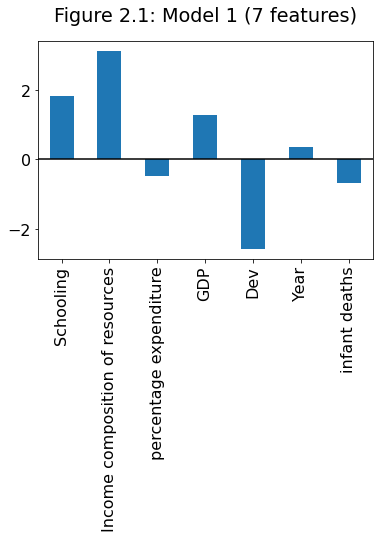

In [19]:
df = pd.DataFrame(coef)

ax = df.plot.bar(legend = None)

plt.axhline(y=0, color='black', linestyle='-')

plt.xticks(range(len(features)), features)

ax.set_title("Figure 2.1: Model 1 (7 features)", pad=20)

plt.savefig('Figure 2_1.png', dpi=300, bbox_inches='tight')

In [20]:
scores = cross_val_score(model, test[features], test["Life expectancy "], cv=10)

scores.mean() 

0.3294570027952831

In [21]:
scores.var()

0.035338404275400116

In [22]:
#MODEL 2 CONSIDERS ADULT MORTALITY

In [23]:
features = ["Schooling", "Income composition of resources", "percentage expenditure", "GDP", "Dev", "Year", "infant deaths", 'Adult Mortality']

model2 = Pipeline([
    
    ("std", StandardScaler()),
    ("lr", LinearRegression())
    
])

model2.fit(train[features], train["Life expectancy "])
model2.score(test[features], test["Life expectancy "])



0.6313068081257391

In [24]:
print(list(zip(coef, features)))

[(1.8307995437581197, 'Schooling'), (3.1349653525998304, 'Income composition of resources'), (-0.4853877858201119, 'percentage expenditure'), (1.2987307935429933, 'GDP'), (-2.5860919062757475, 'Dev'), (0.35153216861930753, 'Year'), (-0.6918096246673665, 'infant deaths')]


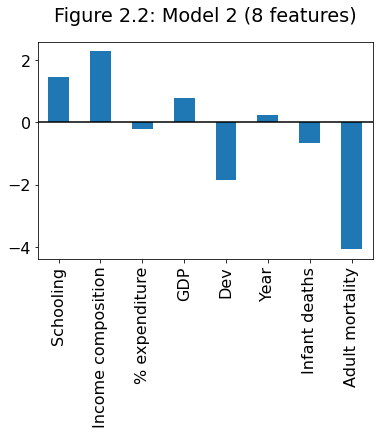

In [25]:
rename_features = ['Schooling', 'Income composition', '% expenditure', 'GDP', 'Dev', 'Year', 'Infant deaths', 'Adult mortality']

coef = model2['lr'].coef_

df = pd.DataFrame(coef)

ax = df.plot.bar(legend = None)

plt.axhline(y=0, color='black', linestyle='-')

plt.xticks(range(len(rename_features)), rename_features)

ax.set_title("Figure 2.2: Model 2 (8 features)", pad=20)

plt.savefig('Figure 2_2.png', dpi=300, bbox_inches='tight')

In [26]:
coef

#weights for numerical features
#GDP inversely affects life expectancy

array([ 1.46515754,  2.27659015, -0.21553081,  0.79348115, -1.83846927,
        0.24907395, -0.67373435, -4.0696284 ])

In [27]:
scores = cross_val_score(model2, test[features], test["Life expectancy "], cv=10)

scores.mean() 

#for 10 different trials with different training and test datasets, the mean R squared score was 42%. 
#42% of the test data(life expectancy) fit the linear regression model

0.6018166840846387

In [28]:
scores.var()

#how spread out r^2 scores are about their mean
#low variance means that model is consistent and reliable, scores aren't dependent on the training/test process

0.02537165337320705

In [29]:
#MODEL 3 REMOVES STANDARD SCALER

features = ["Schooling", "Income composition of resources", "percentage expenditure", "GDP", "Dev", "Year", "infant deaths", 'Adult Mortality']

model3 = Pipeline([
    
    ("lr", LinearRegression())
    
])

model3.fit(train[features], train["Life expectancy "])
model3.score(test[features], test["Life expectancy "])



0.6313068081259505

In [30]:
coef = model3['lr'].coef_

coef

array([ 3.42976400e-01,  9.02490005e+00, -1.07076656e-04,  5.84015210e-05,
       -4.86644418e+00,  5.40735805e-02, -5.61440597e-03, -3.23205709e-02])

In [31]:
print(list(zip(coef, features)))

[(0.3429764001482296, 'Schooling'), (9.024900051109567, 'Income composition of resources'), (-0.00010707665551468182, 'percentage expenditure'), (5.840152103786522e-05, 'GDP'), (-4.866444175182947, 'Dev'), (0.054073580480053264, 'Year'), (-0.0056144059694021725, 'infant deaths'), (-0.03232057090574404, 'Adult Mortality')]


In [32]:
#MODEL 4 CONSIDERS HIV/AIDS w/ Standard Scaler

features = ["Schooling", "Income composition of resources", "percentage expenditure", "GDP", "Dev", "Year", "infant deaths", 'Adult Mortality', ' HIV/AIDS']

model4 = Pipeline([
    
    ('std', StandardScaler()),
    ("lr", LinearRegression())
    
])

model4.fit(train[features], train["Life expectancy "])
model4.score(test[features], test["Life expectancy "])

0.6728528886124925

In [33]:
scores = cross_val_score(model4, test[features], test["Life expectancy "], cv=10)

scores.mean() 

0.5926367948370312

In [34]:
scores.var()

0.045621280607412086

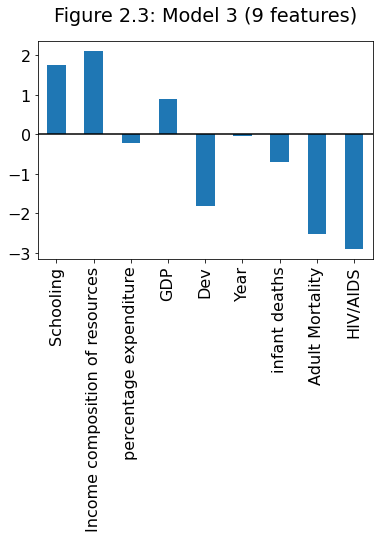

In [35]:
features = ["Schooling", "Income composition of resources", "percentage expenditure", "GDP", "Dev", "Year", "infant deaths", 'Adult Mortality', 'HIV/AIDS']

coef = model4['lr'].coef_

df = pd.DataFrame(coef)

ax = df.plot.bar(legend = None)

plt.axhline(y=0, color='black', linestyle='-')

plt.xticks(range(len(features)), features)

ax.set_title("Figure 2.3: Model 3 (9 features)", pad=20)

plt.savefig('Figure 2_3.png', dpi=300, bbox_inches='tight')

In [36]:
coef

array([ 1.75517795,  2.09705264, -0.23258379,  0.88768817, -1.82040619,
       -0.04647403, -0.7051224 , -2.51470526, -2.89338282])

In [37]:
#MODEL 5 CONSIDERS Polio

features = ["Schooling", "Income composition of resources", "percentage expenditure", "GDP", "Dev", "Year", "infant deaths", 'Adult Mortality', ' HIV/AIDS', 'Polio']

model5 = Pipeline([
    
    ('std', StandardScaler()),
    ("lr", LinearRegression())
    
])

model5.fit(train[features], train["Life expectancy "])
model5.score(test[features], test["Life expectancy "])

0.6940806815197429

([<matplotlib.axis.XTick at 0x7fd500aba7b8>,
 [Text(0, 0, 'Schooling'),
  Text(1, 0, 'Income composition of resources'),
  Text(2, 0, 'percentage expenditure'),
  Text(3, 0, 'GDP'),
  Text(4, 0, 'Dev'),
  Text(5, 0, 'Year'),
  Text(6, 0, 'infant deaths'),
  Text(7, 0, 'Adult Mortality'),
  Text(8, 0, 'HIV/AIDS'),
  Text(9, 0, 'Polio')])

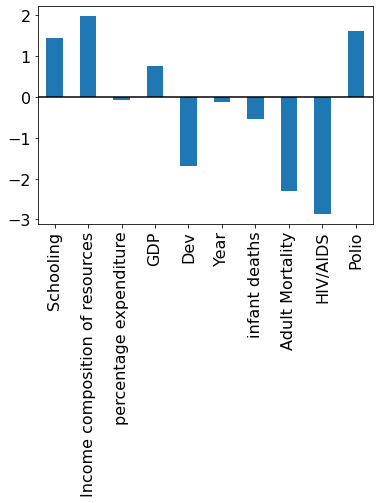

In [38]:
features = ["Schooling", "Income composition of resources", "percentage expenditure", "GDP", "Dev", "Year", "infant deaths", 'Adult Mortality', 'HIV/AIDS', 'Polio']

coef = model5['lr'].coef_

df = pd.DataFrame(coef)

ax = df.plot.bar(legend = None)

plt.axhline(y=0, color='black', linestyle='-')

plt.xticks(range(len(features)), features)

In [39]:
coef

array([ 1.44396354,  1.9797429 , -0.06525755,  0.74703087, -1.6881177 ,
       -0.13345814, -0.54183691, -2.29390493, -2.86369898,  1.61730321])